In [107]:
from DecisionTreeByHand import RegressionTreeFastMse
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [47]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [108]:
df_train = pd.read_csv('train_HousingPrice.csv',  index_col='Id')
df_test = pd.read_csv('test_HousingPrice.csv',  index_col='Id')

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape, df_test.shape

((1460, 80), (1459, 79))

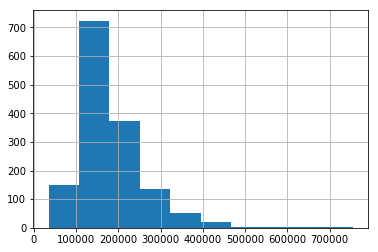

In [5]:
df_train.SalePrice.hist()
pass

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [109]:
missing_values_table(df_train)

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.500
MiscFeature,1406,96.300
Alley,1369,93.800
Fence,1179,80.800
FireplaceQu,690,47.300
LotFrontage,259,17.700
GarageType,81,5.500
GarageYrBlt,81,5.500
GarageFinish,81,5.500
GarageQual,81,5.500


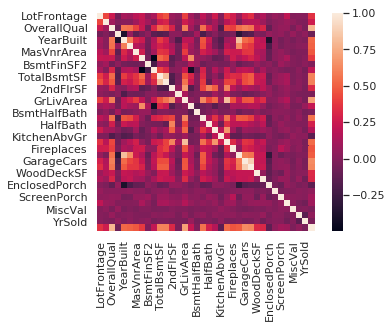

In [110]:
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [111]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

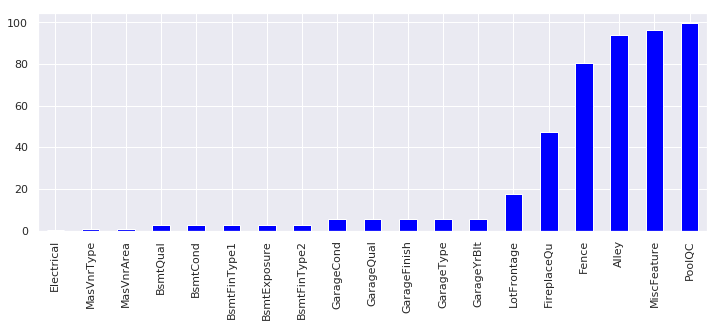

In [112]:
#missingness in train

missing_train = df_train.isnull().sum()/len(df_train.index)*100
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
#plt.xlabel("Column Name")
#plt.ylabel("Percentage Missing")
#plt.title("Percentage Missing in Train Data")
missing_train.plot.bar(width= .5,color = "blue",figsize =(12,4))
pass

In [25]:
#how many columns missing info
len(missing_train)

19

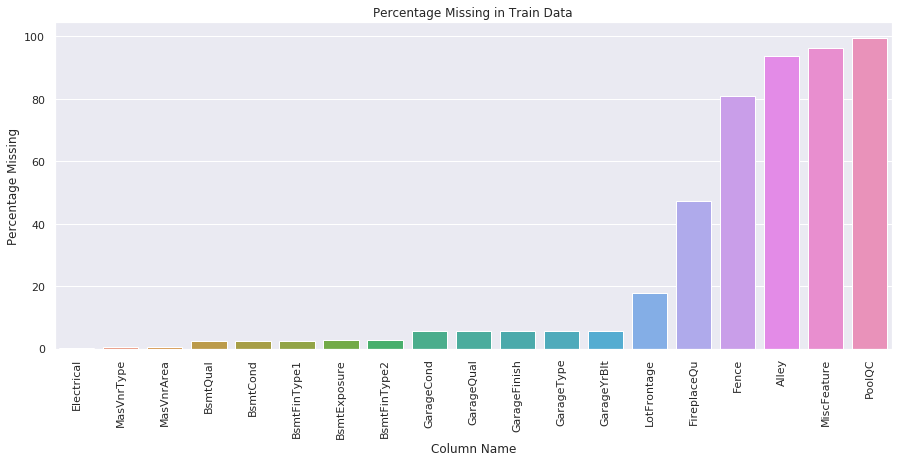

In [27]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_train.index, y =missing_train)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")
plt.show()

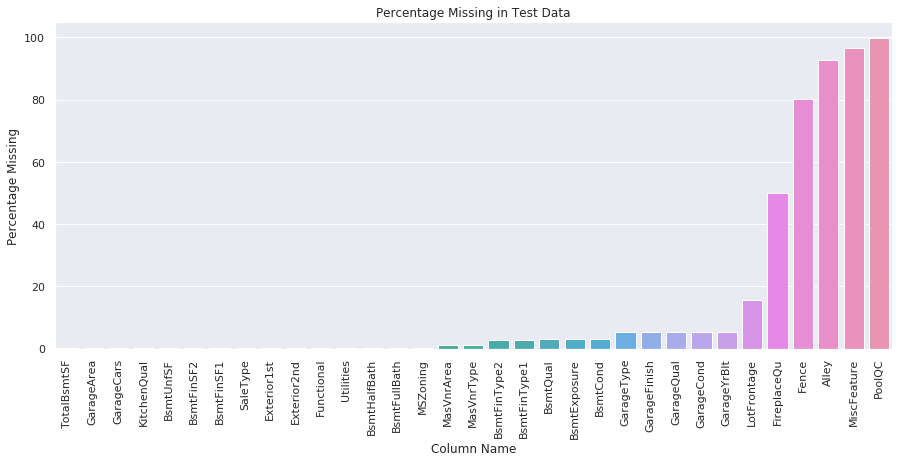

In [113]:
#missingness in train

missing_test = df_test.isnull().sum()/len(df_test.index)*100
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_test.index, y =missing_test)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Test Data")
plt.show()

In [29]:
#how many columns missing info
len(missing_test)

33

### Split data and target 

In [114]:
train = df_train.drop('SalePrice', axis=1)
test = df_train['SalePrice']

In [115]:
train.shape, test.shape

((1460, 79), (1460,))

In [116]:
#data description says NA means typical
train["Functional"] = train["Functional"].fillna("Typ")

for col in ("Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Fence","FireplaceQu",
            "GarageType","GarageFinish","GarageQual","GarageCond","MasVnrType","MiscFeature","PoolQC",'MSSubClass'):
    train[col] = train[col].fillna("None")

for col in ("MiscVal","PoolArea",'TotalBsmtSF',"MiscVal","BsmtFinSF1","BsmtFinSF2", "BsmtHalfBath",
            "BsmtFullBath","BsmtUnfSF","MasVnrArea",'TotalBsmtSF',"Functional","GarageYrBlt", "GarageArea","GarageCars"):
    train[col] = train[col].fillna(0)


#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('Electrical','KitchenQual','MSZoning', 'Exterior1st','Exterior2nd','SaleType'):
    train[col] = train[col].fillna(train[col].mode()[0])
    
    
train = train.drop(['Utilities'], axis=1)

In [117]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na[train_na>0]

In [118]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [119]:
cat_feats = train.dtypes[train.dtypes == "object"].index

In [120]:
cat_feats.shape

(46,)

In [121]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1460, 78)


In [122]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [130]:
#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
skewed_feats = skewed_feats.index
train[skewed_feats] = np.log1p(train[skewed_feats])

In [131]:
train = pd.get_dummies(train)

In [132]:
print(train.shape)
print(test.shape)

(1460, 221)
(1460,)


### Make it for test data and 

In [212]:
X_train, X_test, y_train, y_test = train_test_split(train, test, random_state=17,
                                                   test_size=0.2)

In [213]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1168, 221), (1168,), (292, 221), (292,))

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 221 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(37), int64(22), uint8(162)
memory usage: 915.4 KB


In [283]:
df=pd.read_csv('train_titanic.csv', sep=',')
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [285]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df[['Survived']]
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]

df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 2 }).values
df['Embarked'] = df['Embarked'].map({'C' : 1, 'S' : 2, 'Q' : 3}).values
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000,1,0,7.250,NaN,2.000
1,1,2,38.000,1,0,71.283,C85,1.000
2,3,2,26.000,0,0,7.925,NaN,2.000
3,1,2,35.000,1,0,53.100,C123,2.000
4,3,1,35.000,0,0,8.050,NaN,2.000


In [286]:
(df.isnull().sum()).sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Fare          0
Parch         0
SibSp         0
Sex           0
Pclass        0
dtype: int64

In [287]:
df = df.fillna('0')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000,1,0,7.250,0,2.000
1,1,2,38.000,1,0,71.283,C85,1.000
2,3,2,26.000,0,0,7.925,0,2.000
3,1,2,35.000,1,0,53.100,C123,2.000
4,3,1,35.000,0,0,8.050,0,2.000


In [288]:
le.fit(df['Cabin'])
df['Cabin'] = le.transform(df['Cabin'])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000,1,0,7.250,0,2.000
1,1,2,38.000,1,0,71.283,82,1.000
2,3,2,26.000,0,0,7.925,0,2.000
3,1,2,35.000,1,0,53.100,56,2.000
4,3,1,35.000,0,0,8.050,0,2.000


In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.2, random_state=0, stratify=y)
cols = pd.DataFrame(X_train.columns)

In [290]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [298]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier();
tree.fit(X_train, Y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

print('train acc:', np.round(accuracy_score(Y_train, pred_train), 2))
print('test acc: ', np.round(accuracy_score(Y_test, pred_test), 2))

('train acc:', 0.98999999999999999)
('test acc: ', 0.79000000000000004)


In [299]:
test = pd.read_csv('test_titanic.csv', sep=',')
X_test =test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]

X_test['Sex'] = X_test['Sex'].map({'male' : 1, 'female' : 2 }).values
X_test['Embarked'] = X_test['Embarked'].map({'C' : 1, 'S' : 2, 'Q' : 3}).values
X_test = X_test.fillna('0')


le = LabelEncoder()
le.fit(X_test['Cabin'])
X_test['Cabin'] = le.transform(X_test['Cabin'])

ss=StandardScaler()
X=ss.fit_transform(X_test)

pred = tree.predict(X)

answer = pd.DataFrame(pred, columns=['Survived'])
answer['PassengerId'] = test['PassengerId']
answer=answer.reindex(columns=['PassengerId', 'Survived'])

answer.to_csv('answer.csv', index = False)

In [300]:
cols['importances'] = tree.feature_importances_
cols.sort_values(by = 'importances', ascending = False).head(15)

,0,importances
1,Sex,0.309
5,Fare,0.240
2,Age,0.201
6,Cabin,0.091
0,Pclass,0.084
3,SibSp,0.029
7,Embarked,0.024
4,Parch,0.021


In [301]:
df=pd.read_csv('train_titanic.csv', sep=',')
le = LabelEncoder()
y = df[['Survived']]
df = df[['Sex', 'Age', 'Fare']]
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 2 }).values
df.head()

,Sex,Age,Fare
0,1,22.000,7.250
1,2,38.000,71.283
2,2,26.000,7.925
3,2,35.000,53.100
4,1,35.000,8.050


In [302]:
(df.isnull().sum()).sort_values(ascending=False)

Age     177
Fare      0
Sex       0
dtype: int64

In [303]:
df = df.fillna(0)
df['Age'] = df['Age'].astype('float')
df_copy = df
df.head()

,Sex,Age,Fare
0,1,22.000,7.250
1,2,38.000,71.283
2,2,26.000,7.925
3,2,35.000,53.100
4,1,35.000,8.050


In [304]:
train = df_copy

In [312]:
class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, data):
        val = data[self.column]
        return val >= self.value
    
    
class Leaf:
    def __init__(self, data):
        self.predictions = class_counts(data)

        
class Decision_Node:
    def __init__(self, question, right_branch, left_branch):
        self.question = question
        self.right_branch = right_branch
        self.left_branch = left_branch

In [311]:
def class_counts(data):
    counts = {}
    for row in data:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


def find_best_split(data):
    best_gain = 0
    best_question = None
    current = gini(data)
    
    for col in range(len(data[0]) - 1):
        values = set([row[col] for row in data])
        
        for val in values:
            question = Question(col, val)
            right_data, left_data = part(data, question)
        
            if len(right_data) == 0 or len(left_data) == 0:
                continue
                
            gain = info_gain(left_data, right_data, current)
            
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [310]:
def gini(data):
    counts = class_counts(data)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(data))
        impurity -= prob_of_lbl**2
    return impurity

def info_gain(left, right, current):
    p = float(len(right)) / (len(right) + len(left))
    return current - p * gini(right) - (1 - p) * gini(left)

In [309]:
def predict(data, model):
    ans = []
    for i in range(data.shape[0]):
        ans.append(int(_predict(classify(data[i], model))))
    return ans
    
def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions
    if node.question.match(row):
        return classify(row, node.right_branch)
    else:
        return classify(row, node.left_branch)

def _predict(counts):
    total = float(sum(counts.values()))
    for cl in counts.keys():
        return cl

In [308]:
def part(data, question):
    right_data, left_data = [], []
    for row in data:
        if question.match(row):
            right_data.append(row)
        else:
            left_data.append(row)
    return right_data, left_data

def build_tree(data):
    gain, question = find_best_split(data)
    if gain == 0:
        return Leaf(data)
    right_data, left_data = part(data, question)
    right_branch = build_tree(right_data)
    left_branch = build_tree(left_data)
    return Decision_Node(question, right_branch, left_branch)

In [320]:
def myMinMaxScaler(data):
    #data = data.to_numpy()
    xmax = np.float64(data.max(axis = 0))
    xmin = np.float64(data.min(axis = 0))
    data = data.transpose()
    for i in range(data.shape[0]):
        data[i] = (data[i] - xmin[i]) / (xmax[i] - xmin[i])
    return data.transpose()

In [322]:
def split_data(data, size):
    results = [], []
    for row in data:
        results[0 if np.random.random() < size else 1].append(row)    
    return results

def my_train_test_split(x, y, test_size):
    data = np.hstack((x, y))
    train, test = split_data(data, 1 - test_size)
    return np.array(train), np.array(test)

In [323]:
def my_accuracy(data, pred):
    length = len(data)
    count_wrong = 0
    for i in range(data.shape[0]):
        if data[i][-1] != pred[i]:
            count_wrong += 1
    return 100 - count_wrong / length

In [318]:
X_all = pd.DataFrame(df_copy)

In [321]:
X_all_norm = myMinMaxScaler(X_all)
print(X_all_norm.min(), X_all_norm.max())

(Sex    0.000
Age    0.000
Fare   0.000
dtype: float64, Sex      2.000
Age     80.000
Fare   512.329
dtype: float64)


In [350]:
train, test = my_train_test_split(X_all_norm, y, 0.2)
train.shape, test.shape

((708, 4), (183, 4))

In [354]:
tree = build_tree(train)

In [355]:
pred_tr = predict(train, tree)
pred_te = predict(test, tree)
print('train acc: ', np.round(my_accuracy(train, pred_tr), 2))
print('test acc:', np.round(my_accuracy(test, pred_te), 2))

('train acc: ', 100)
('test acc:', 100)


In [347]:
test = pd.read_csv('test_titanic.csv', sep=',')
X_test =test[['Sex', 'Age', 'Fare']]

X_test['Sex'] = X_test['Sex'].map({'male' : 1, 'female' : 2 }).values
X_test = X_test.fillna(0)


In [348]:
X_test_norm = myMinMaxScaler(X_test)

In [356]:
pred_ans = predict(X, tree)

In [357]:
answer = pd.DataFrame(pred_ans, columns=['Survived'])
answer['PassengerId'] = test['PassengerId']
answer=answer.reindex(columns=['PassengerId', 'Survived'])
answer['Survived'] = answer['Survived'].astype('int')

answer.to_csv('answer_17.05.2019_22:44.csv', index = False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Create model and fit 

In [313]:
fast_mse = RegressionTreeFastMse(4, min_size=10)

In [314]:
fast_mse.fit(train,y)

TypeError: unhashable type

In [246]:
fast_mse_pr = fast_mse.predict(train.as_matrix())
fast_mse_mse = fast_mse.mse(fast_mse_pr, test.as_matrix())      

In [247]:
round(fast_mse_mse,2)

1568958318.39

In [242]:
model = DecisionTreeRegressor(max_depth=2)
 # из Sklearn
model.fit(train.as_matrix(),test.as_matrix())

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [237]:
predict_sk = model.predict(X_train.as_matrix())
predict_sk_mse = ((y_train.as_matrix() - predict_sk) ** 2).sum()/len(predict_sk) #MSE calculating

In [238]:
round(predict_sk_mse, 2)

2102697792.03

In [248]:
fast_mse_mse

1568958318.387985

In [201]:
X.shape, df_test.shape

((20640, 8), (1459, 79))

In [207]:
train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,9,4.190,9.042,0.693,1,3,0.000,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
2,4,4.394,9.170,0.693,1,3,0.000,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
3,9,4.234,9.328,0.693,1,0,0.000,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
4,10,4.111,9.164,0.693,1,0,0.000,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
5,9,4.443,9.565,0.693,1,0,0.000,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


In [197]:
predict_sk = np.asarray(fast_mse.predict(df_test))

KeyError: 0

In [99]:
y_train

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
704,3,4.344,8.940,0.693,1,3,0.000,5,8,1900,...,0,0,0,1,0,0,0,0,1,0
1362,4,4.828,9.690,0.693,1,0,0.693,7,4,2005,...,0,0,0,1,0,0,0,0,1,0
938,9,4.331,9.177,0.693,1,3,0.000,7,4,2005,...,0,0,0,1,0,0,0,0,1,0
1331,4,4.454,9.210,0.693,1,3,0.000,8,4,2006,...,0,0,0,1,0,0,0,0,1,0
114,4,4.317,9.952,0.693,1,3,0.000,6,4,1953,...,0,0,0,0,1,0,0,0,0,0
1429,5,4.111,8.882,0.693,1,3,0.000,5,6,1940,...,0,0,0,1,1,0,0,0,0,0
311,9,4.190,8.947,0.693,1,0,0.000,6,4,1993,...,0,0,0,1,0,0,0,0,1,0
1143,9,4.357,9.207,0.693,1,3,0.000,8,4,2006,...,0,1,0,0,0,0,0,0,0,1
767,9,4.394,9.252,0.693,1,3,0.000,7,4,1988,...,0,0,0,1,0,0,0,0,1,0
